<a href="https://colab.research.google.com/github/NikhilNandoskar/Back-Propagation-of-Errors-and-Multilayer-Perceptrons-using-Tensorflow/blob/master/Copy_of_Kaggle_API_access_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

In [2]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

-rw-r--r-- 1 root root 72 Jun 11 00:08 kaggle.json


In [0]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [0]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [13]:
# List available datasets.
!kaggle datasets list -s distracted

ref                                                  title                                            size  lastUpdated          downloadCount  
---------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  
gkurman24/recreated-distracted-driver-dataset        Recreated Distracted Driver data set from 2016   11KB  2018-05-08 01:51:57            106  
fivethirtyeight/fivethirtyeight-bad-drivers-dataset  FiveThirtyEight Bad Drivers Dataset               2KB  2019-04-26 15:00:52            522  
nirbhay727452/distracteddriverdetection              distractedDriverDetection                       188MB  2020-04-23 16:39:27              9  
monicaoui/bad-drivers                                bad drivers                                       1KB  2018-05-01 07:24:54             91  


In [34]:
# Copy the stackoverflow data set locally.
!kaggle datasets download -d nirbhay727452/distracteddriverdetection -p /content

 98% 185M/188M [00:03<00:00, 42.5MB/s]
100% 188M/188M [00:03<00:00, 55.9MB/s]


In [0]:
!mkdir stateFarm

In [0]:
!cp "/content/distracteddriverdetection.zip" "/content/stateFarm"

In [38]:
cd stateFarm

/content/stateFarm


In [39]:
!ls

distracteddriverdetection.zip


In [40]:
!unzip \*.zip

Archive:  distracteddriverdetection.zip
  inflating: data/test/test/img_1.jpg  
  inflating: data/test/test/img_10.jpg  
  inflating: data/test/test/img_100.jpg  
  inflating: data/test/test/img_1000.jpg  
  inflating: data/test/test/img_1001.jpg  
  inflating: data/test/test/img_1002.jpg  
  inflating: data/test/test/img_1003.jpg  
  inflating: data/test/test/img_1004.jpg  
  inflating: data/test/test/img_1006.jpg  
  inflating: data/test/test/img_1007.jpg  
  inflating: data/test/test/img_1008.jpg  
  inflating: data/test/test/img_1009.jpg  
  inflating: data/test/test/img_101.jpg  
  inflating: data/test/test/img_1011.jpg  
  inflating: data/test/test/img_1013.jpg  
  inflating: data/test/test/img_1014.jpg  
  inflating: data/test/test/img_1015.jpg  
  inflating: data/test/test/img_1017.jpg  
  inflating: data/test/test/img_1018.jpg  
  inflating: data/test/test/img_1020.jpg  
  inflating: data/test/test/img_1021.jpg  
  inflating: data/test/test/img_1022.jpg  
  inflating: data/tes

In [47]:
!pwd

/content/stateFarm/data


In [46]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [0]:
def loadDataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np_utils.to_categorical(np.array(data['target']), 10)
    return files, targets


In [0]:
train_files, train_targets = loadDataset('/content/stateFarm/data/train')

test_files,test_targets= loadDataset('/content/stateFarm/data/test')

names = [item[17:19] for item in sorted(glob("/content/stateFarm//data/train/*/"))]

In [51]:
X_train, X_valid, y_train, y_valid = train_test_split(train_files, train_targets, test_size=0.2, random_state=42, shuffle=True)
print("Total images in X_train: ", len(X_train))
print("Total images in X_valid: ", len(X_valid))
print("Shape of X is", X_train.shape)
print("Shape of y is", y_train.shape)

Total images in X_train:  2484
Total images in X_valid:  622
Shape of X is (2484,)
Shape of y is (2484, 10)


In [0]:
# Converting shape of y from (y,10) to (10,)
import numpy as np
def y_reshape(y):
  res = []
  for i in range(len(y)):
    for j in range(len(y[0])):
      if y[i][j]==1: res.append(j)
  res = np.array(res)
  return res.reshape(-1,1)

In [63]:
y_train = y_reshape(y_train)
y_valid = y_reshape(y_valid)
print("Shape of Y train is: ", y_train.shape)
print("Shape of Y valid is: ", y_valid.shape)

Shape of Y train is:  (2484, 1)
Shape of Y valid is:  (622, 1)


In [65]:
# Lest check number of classes
number_classes = np.unique(y_train).shape[0]
print(number_classes)

10


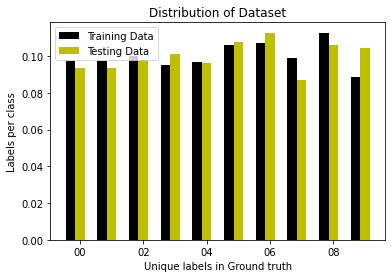

In [76]:
# bar-chart of classes distribution
import matplotlib.pyplot as plt

train_unique_classes, test_unique_classes = np.zeros(number_classes), np.zeros(number_classes)
for u_c in range(number_classes):
    train_unique_classes[u_c] = np.sum(y_train == u_c)  / X_train.shape[0]
    test_unique_classes[u_c] = np.sum(y_valid == u_c)   / X_valid.shape[0]
fig, ax = plt.subplots()
col_width = 0.3
bar_train = ax.bar(np.arange(number_classes), train_unique_classes, width=col_width, color='k')
bar_test = ax.bar(np.arange(number_classes)+col_width, test_unique_classes, width=col_width, color='y')
ax.set_ylabel('Labels per class')
ax.set_xlabel('Unique labels in Ground truth')
ax.set_title('Distribution of Dataset')
ax.set_xticks(np.arange(0, number_classes, 2)+col_width)
ax.set_xticklabels(['{:02d}'.format(c) for c in range(0, number_classes, 2)])
ax.legend((bar_train[0], bar_test[0]), ('Training Data', 'Testing Data'),loc='best')
plt.show()

(480, 640, 3)


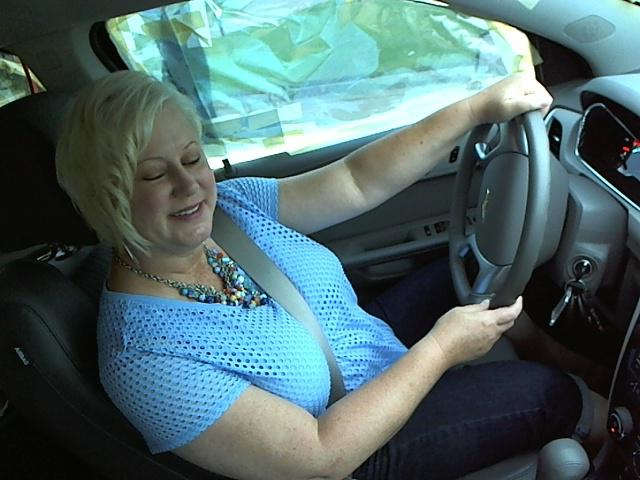

In [94]:
import cv2 
from google.colab.patches import cv2_imshow
img = cv2.imread("train/c9/img_9993.jpg",cv2.IMREAD_UNCHANGED)
print(img.shape)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [92]:
cd data

/content/stateFarm/data
